In [111]:
#import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

Kaggle Dataset:
https://www.kaggle.com/datasets/muhammadehsan02/alzheimers-disease-patient-data 

In [114]:
#reading the alzheimer's patient dataset
patient_df = pd.read_csv('alzheimers_disease_patient_data.csv')

In [116]:
patient_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [118]:
#checking for null values in dataset
patient_df.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [120]:
#removing irrelevant columns from data
patient_df.drop('SystolicBP', axis = 1, inplace = True)
patient_df.drop('DiastolicBP', axis = 1, inplace = True)
patient_df.drop('CholesterolLDL', axis = 1, inplace = True)
patient_df.drop('CholesterolHDL', axis = 1, inplace = True)
patient_df.drop('CholesterolTriglycerides', axis = 1, inplace = True)
patient_df.drop('DoctorInCharge', axis = 1, inplace = True)

In [122]:
patient_df.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
CholesterolTotal             0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosis                    0
dtype: int64

In [124]:
#description of data to find outliers
patient_df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\liyay\AppData\Local\Temp\ipykernel_21836\1212638133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosed_df['AgeRange'] = pd.cut(diagnosed_df['Age'], bins=bins, labels=labels, right=False)


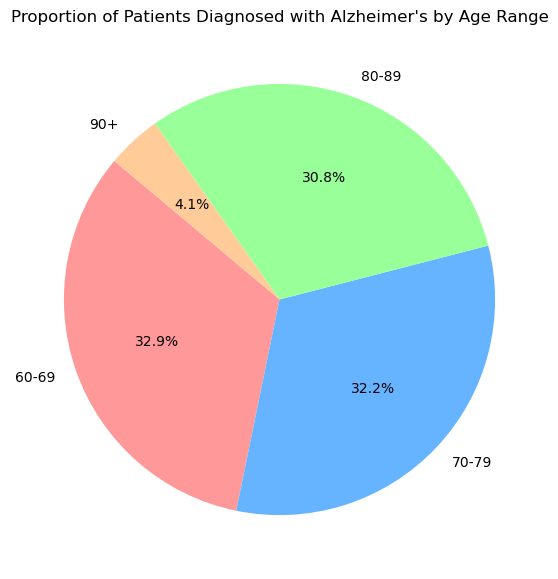

<Figure size 640x480 with 0 Axes>

In [126]:
diagnosed_df = patient_df[patient_df['Diagnosis'] == 1]
bins = [60, 70, 80, 90, 100]
labels = ['60-69', '70-79', '80-89', '90+']
diagnosed_df['AgeRange'] = pd.cut(diagnosed_df['Age'], bins=bins, labels=labels, right=False)
age_range_counts = diagnosed_df['AgeRange'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(age_range_counts, labels=age_range_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Proportion of Patients Diagnosed with Alzheimer\'s by Age Range')
plt.show()
plt.savefig('piechart.png')

NameError: name 'x' is not defined

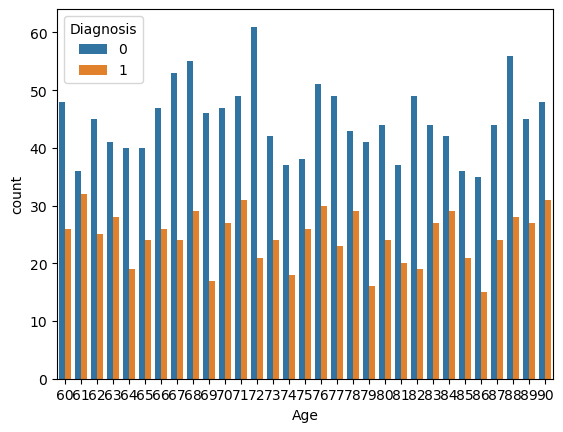

In [128]:
#this visualization shows the ages of diagnosed patients
sns.countplot(x='Age', hue= 'Diagnosis', data=patient_df)
x.len(labels)
plt.savefig('Age.Diagnosis.png')

In [ ]:
#This visualization shows which lifestyle factors are seen most in Alzheimer's patients
#creating labels for x-axis
labels = ["Alcohol Consumption (Units Per Week)", "Physical Activity (Hours Per Week)", "Diet Quality", "Sleep Quality"]

#creating mean values for both diagnosed and undiagnosed patients in terms of each lifestyle factor
diagnosed = patient_df[patient_df['Diagnosis'] == 1]
undiagnosed = patient_df[patient_df['Diagnosis'] == 0]
d_means = [diagnosed["AlcoholConsumption"].mean(), diagnosed["PhysicalActivity"].mean(), diagnosed["DietQuality"].mean(), diagnosed["SleepQuality"].mean()]
u_means = [undiagnosed["AlcoholConsumption"].mean(), undiagnosed["PhysicalActivity"].mean(), undiagnosed["DietQuality"].mean(), undiagnosed["SleepQuality"].mean()]

#making the chart
fig, ax = plt.subplots()
x = np.arange(len(labels))
width = 0.4
plt.bar(x - width/2, d_means, width, label='Diagnosed')
plt.bar(x + width/2, u_means, width, label='Undiagnosed')
ax.set_title('Physical Factors in Diagnosed and Undiagnosed Patients')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('PhysicalFactors.png')

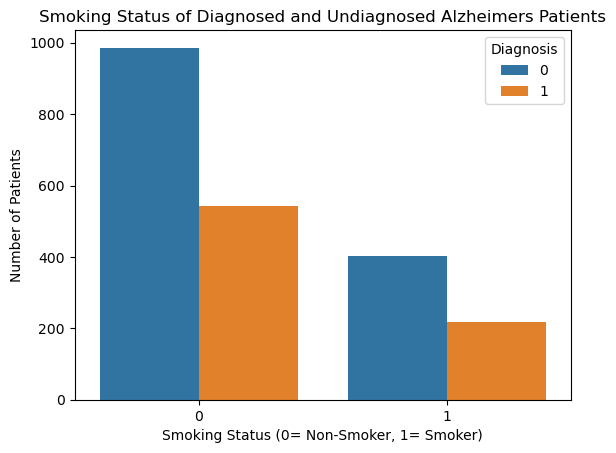

In [131]:
#this visualization uses a bar graph to compare each physical factor and how many patients are diagnosed with Alzheimer's
#Smoking - Diagnosis
sns.countplot(x='Smoking', hue='Diagnosis', data=patient_df)
plt.title('Smoking Status of Diagnosed and Undiagnosed Alzheimers Patients')
plt.xlabel('Smoking Status (0= Non-Smoker, 1= Smoker)')
plt.ylabel('Number of Patients')
#saves figure as png
plt.savefig('Smoking.Diagnosis.png')

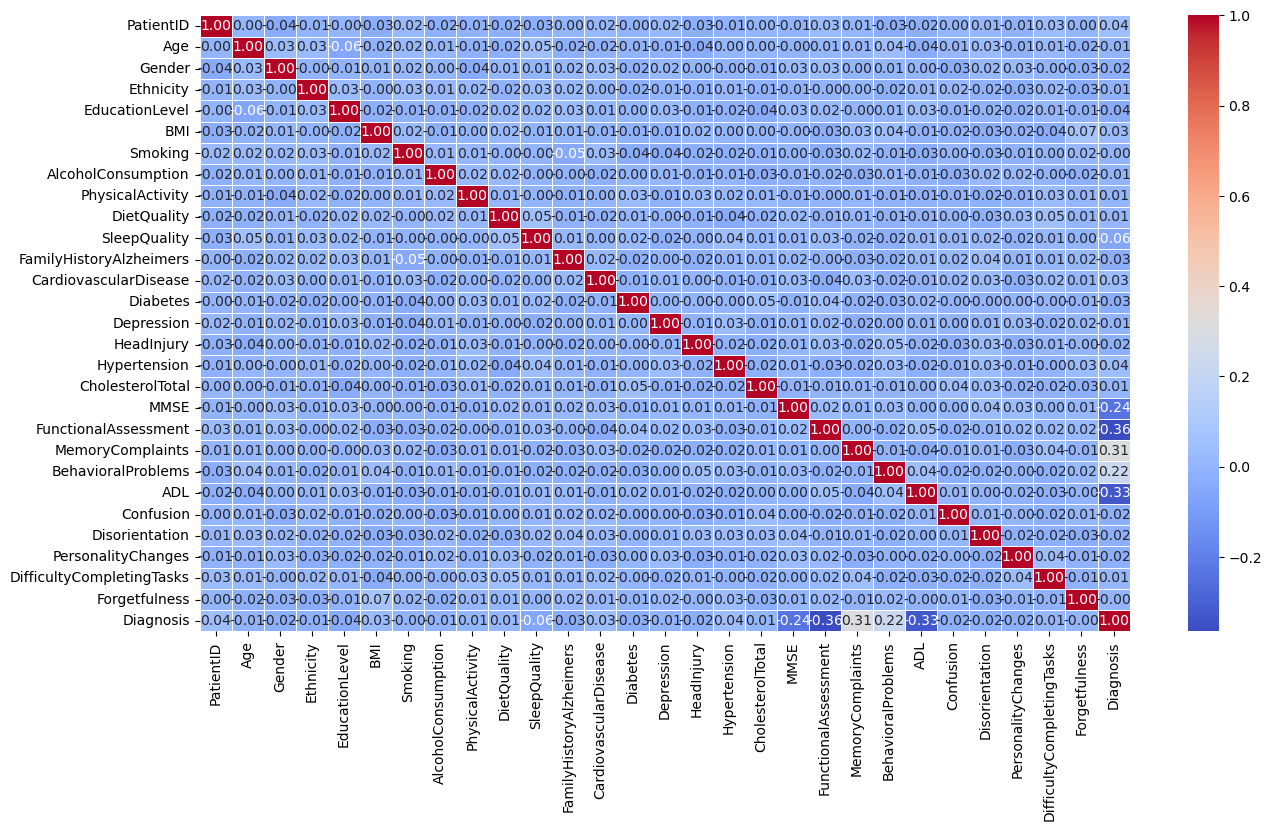

In [133]:
#correlation matrix
patient_df_encoded = pd.get_dummies(patient_df, drop_first=True)
corr_matrix = patient_df_encoded.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.savefig('corrMatrix')
plt.show()

In [134]:
#setting X and y values
selected_features = ['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes']
X_selected = patient_df[selected_features]
y = patient_df['Diagnosis']


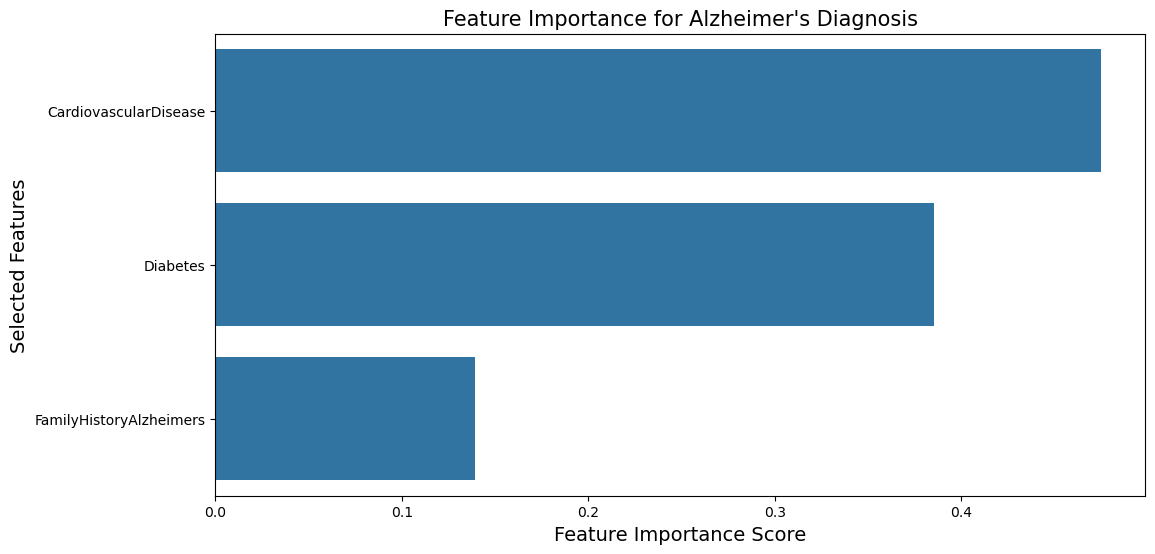

<Figure size 640x480 with 0 Axes>

In [135]:
#comparing effects of family history of Alzheimers, cardiovascular disease, and diabetes
#seeing which feature of the three is most important to if the patient has Alzheimer's

#initializing and fitting classifier and sorting features by importance
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_selected, y)
fi = clf.feature_importances_
fi = pd.Series(data=fi, index=X_selected.columns)
fi.sort_values(ascending=False, inplace=True)

#bar plot
plt.figure(figsize=(12,6))
chart= sns.barplot(x=fi, y=fi.index)
plt.xlabel("Feature Importance Score", fontsize=14)
plt.ylabel("Selected Features", fontsize=14)
plt.title("Feature Importance for Alzheimer's Diagnosis", fontsize=15)
plt.show()
plt.savefig('features.png')

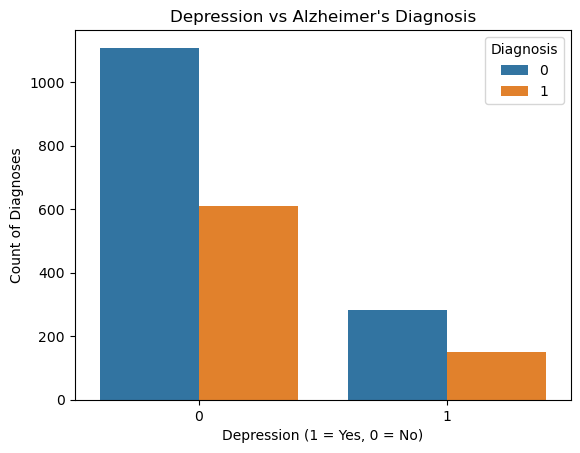

In [136]:
#depression count in diagnoses
sns.countplot(x='Depression', hue='Diagnosis', data=patient_df)
plt.title("Depression vs Alzheimer's Diagnosis")
plt.xlabel("Depression (1 = Yes, 0 = No)")
plt.ylabel("Count of Diagnoses")
plt.show()